# Upper Confidence Bound (UCB)

## Importing the libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [31]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
print(dataset.head())

   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


In [32]:
# we have 10 ads and we have to figure out which ad attracts the most people
# each click is regitered as 1 else 0
# so eg for first row if the alg picked ad1, ad5 or ad9 to show it would get 1 otherwise 0
# this is a simulation of real time process
# Assumes that each ad has fixed convertion rate

## Implementing UCB

In [33]:
import math
N = 10000
d = 10

# ad selected at round n
ad_selected = []

# number of times ad i was chosen
# upto round n
number_of_selections = [0]*d;
# sum of rewards of ad i upto round n
sum_of_rewards = [0]*d

# we want to maximizie this
total_reward = 0

for n in range(0, N):
  ad = 0 # we start from ad1
  max_upper_bound = 0
  for i in range (0, d):
    # compute the ucb for each ad
    if number_of_selections[i] > 0:
      average_reward = sum_of_rewards[i]/number_of_selections[i]
      delta_i = math.sqrt((3 * math.log(n+1))/(2 * number_of_selections[i]))
      ucb = average_reward + delta_i
    else:
      ucb = 1e400 # default confidence
      # this high value ensures that if it wasn't selected yet it will be selected
    
    # updating the max confindence bound computing ucb of each ad
    if ucb > max_upper_bound:
      # select ad i
      max_upper_bound = ucb
      ad = i
      
  ad_selected.append(ad)
  number_of_selections[ad] = number_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sum_of_rewards[ad] = sum_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

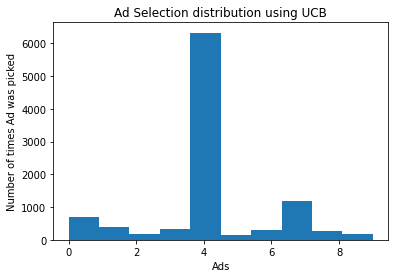

total_clicks 2178
reward percentage: 21.78


In [34]:
plt.hist(ad_selected)
plt.xlabel('Ads')
plt.ylabel('Number of times Ad was picked')
plt.title('Ad Selection distribution using UCB')
plt.show()
print('total_clicks', total_reward)
print('reward percentage:',(total_reward/N)*100)
# if we picked randomly we would get a reward of 1000 (if they were all equal distribution) 
# which is 10% so we doubled the rewards

Note: it can find the best ad in 1000 rounds

TODO: figure out the actual probabilites of each ad and find out the reward we would have gotten if we would have picked uniformly in the 10 ads  
P(d) = (# row entries where dth column = 1)/N